### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Loading the dataset
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In this dataset we have total 7043 rows and 21 columns

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have total 
* 1 - Float object type
* 2 - Integer object type
* 18 - Object object type

In [6]:
# check for the null values/missing vlaues
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Fortnuately, we have 0 null values which is a good sign.

EDA

In [7]:
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
# dropping the variable 'customerID' as it does not helps in model building
df.drop("customerID",axis=1,inplace=True)

In [9]:
print(df['gender'].value_counts())

print()

print(df['SeniorCitizen'].value_counts())

print()

print(df['Partner'].value_counts())

print()

print(df['Dependents'].value_counts())

print()

print(df['PhoneService'].value_counts())

print()

print(df['MultipleLines'].value_counts())

print()

print(df['InternetService'].value_counts())

print()

print(df['OnlineSecurity'].value_counts())

print()

print(df['OnlineBackup'].value_counts())

print()

print(df['DeviceProtection'].value_counts())

print()

print(df['TechSupport'].value_counts())

print()

print(df['StreamingTV'].value_counts())

print()

print(df['StreamingMovies'].value_counts())

print()

print(df['Contract'].value_counts())

print()

print(df['PaperlessBilling'].value_counts())

print()

print(df['PaymentMethod'].value_counts())

print()

print(df['Churn'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes     

Observation
* The data is very has a crisp classification in most of the columns
* In multiple columns (MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) we have details like 'no internet service' which can be converted to either to Yes or No.

MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, 

In [10]:
# converting 'No phone service & No internet service' values into 'No' as both category sounds similar
# Doing this also helps us in label encoding as it retains the minimum categories
df["MultipleLines"] = df["MultipleLines"].replace('No phone service','No')
df["OnlineSecurity"] = df["OnlineSecurity"].replace('No internet service','No')
df["OnlineBackup"] = df["OnlineBackup"].replace('No internet service','No')
df["DeviceProtection"] = df["DeviceProtection"].replace('No internet service','No')
df["TechSupport"] = df["TechSupport"].replace('No internet service','No')
df["StreamingTV"] = df["StreamingTV"].replace('No internet service','No')
df["StreamingMovies"] = df["StreamingMovies"].replace('No internet service','No')
df["PaymentMethod"] = df["PaymentMethod"].replace(['Electronic check','Mailed check'],'Cheque')

### Visualization

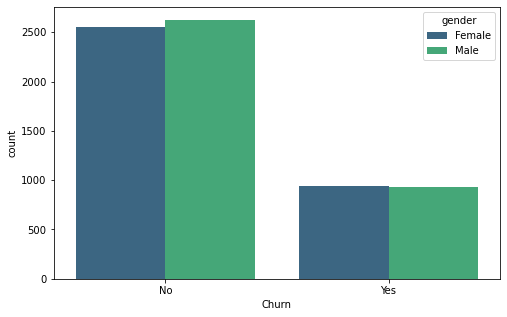

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='gender',data=df)
plt.show()

As we can see, there is no much findings in gender category.

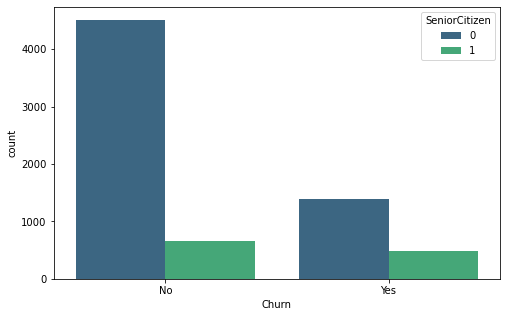

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='SeniorCitizen',data=df)
plt.show()

Here, we can notice that the younger generation are the one who churn more.

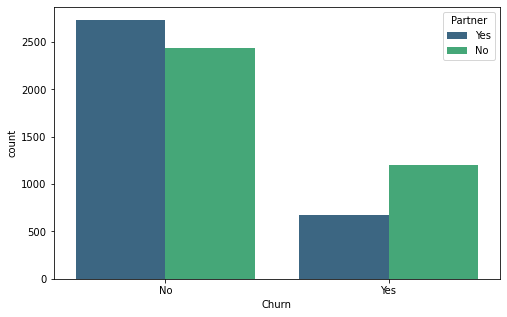

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='Partner',data=df)
plt.show()

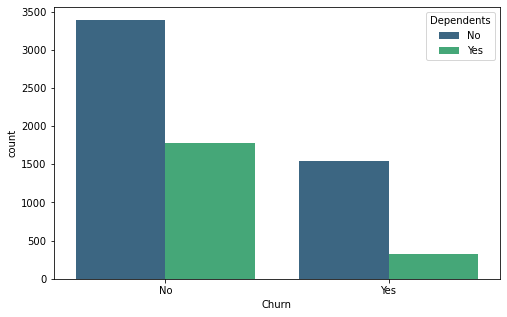

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='Dependents',data=df)
plt.show()

With the above plots, we can notice that the people who doesn't have partners are the one who churn more.

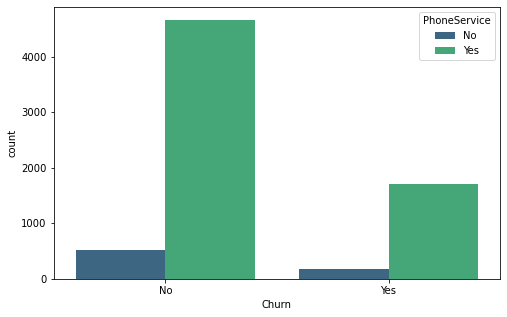

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='PhoneService',data=df)
plt.show()

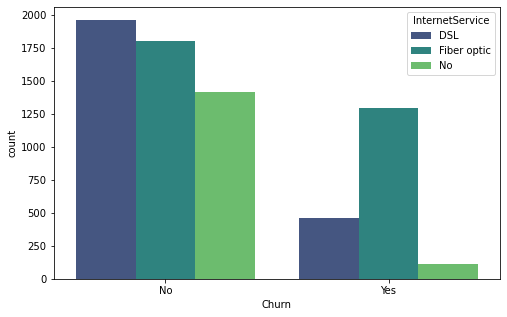

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='InternetService',data=df)
plt.show()

As we can see, too many customers who has FiberOptic service are leaving the network. 

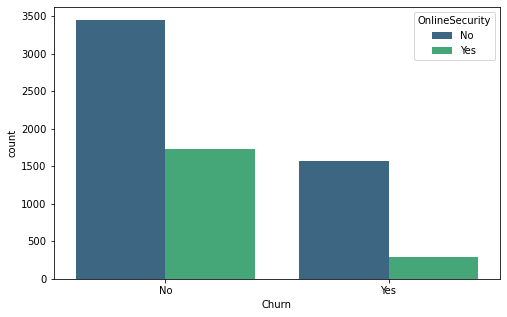

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='OnlineSecurity',data=df)
plt.show()

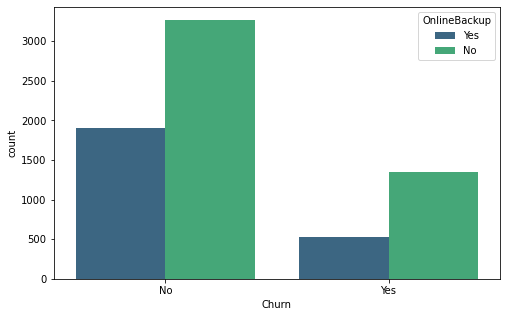

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='OnlineBackup',data=df)
plt.show()

As we can see, churning numbers are less in customers who has OnlineSecurity and OnlineBackup

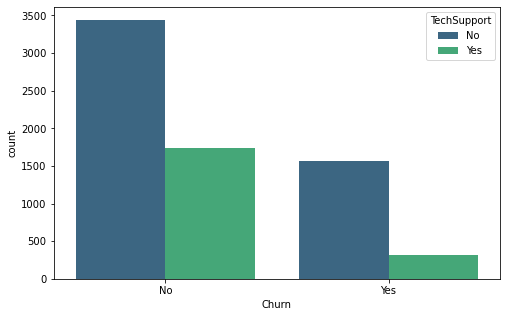

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='TechSupport',data=df)
plt.show()

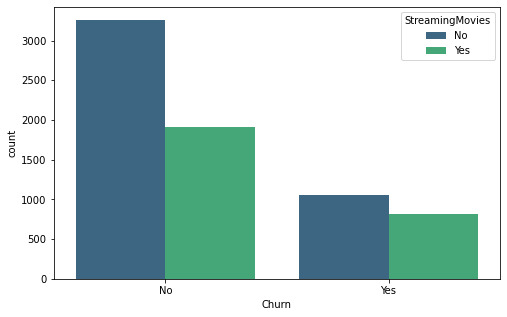

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='StreamingMovies',data=df)
plt.show()

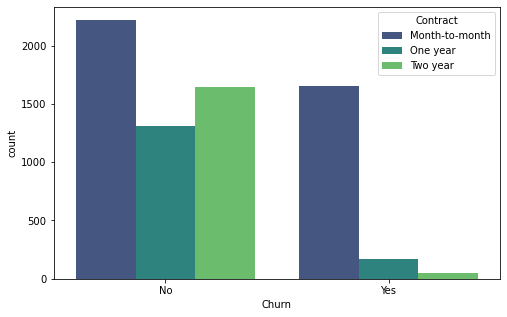

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='Contract',data=df)
plt.show()

Here, its very clear that customers who are in yearly contract are less prone to churn.

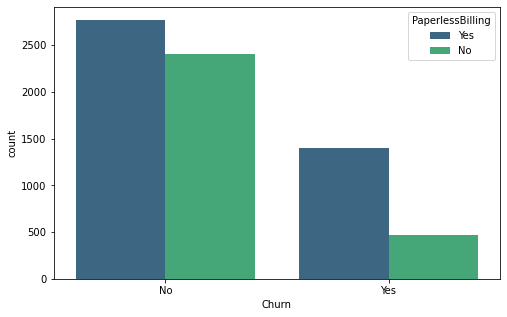

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='PaperlessBilling',data=df)
plt.show()

Paperless Billing customers are the one who morelikely to leave the network

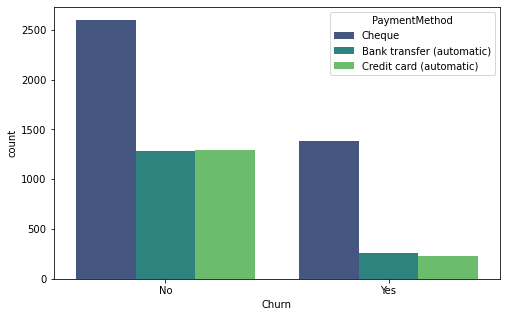

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(df['Churn'],palette='viridis',hue='PaymentMethod',data=df)
plt.show()

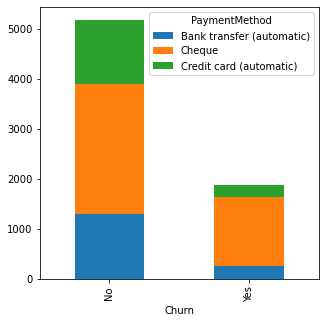

In [24]:
df.groupby(['Churn','PaymentMethod']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

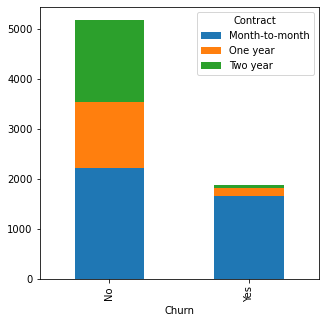

In [25]:
df.groupby(['Churn','Contract']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

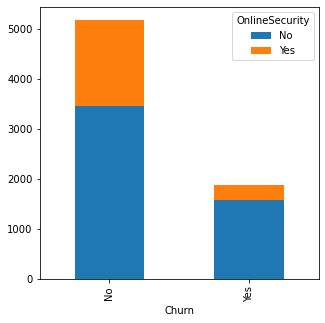

In [26]:
df.groupby(['Churn','OnlineSecurity']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

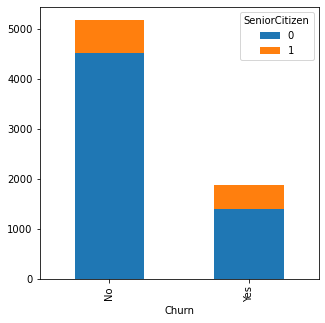

In [27]:
df.groupby(['Churn','SeniorCitizen']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

Senior Citizens are less likely to churn

Too many Customers who make payments through cheque are leaving the network

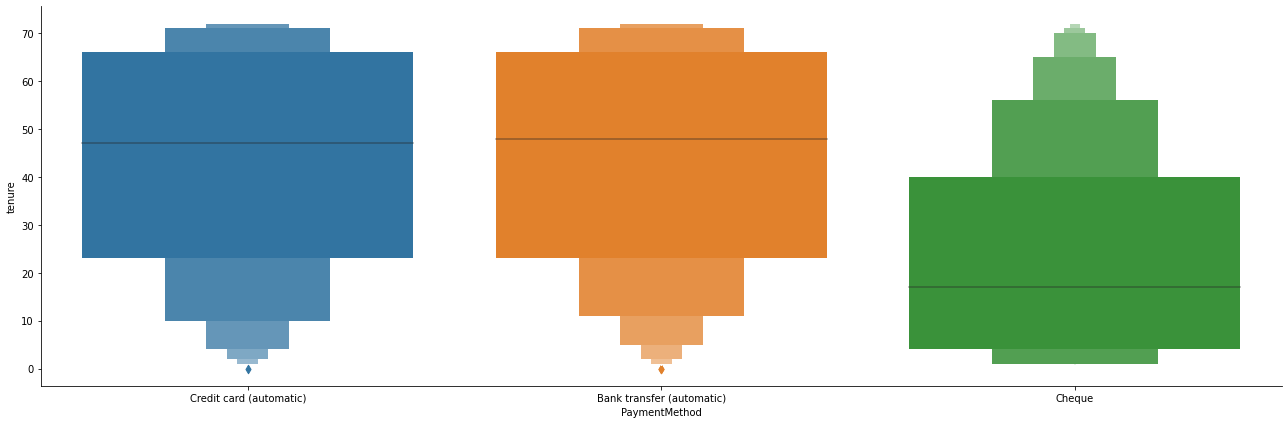

In [28]:
# PaymentMethod vs tenure
sns.catplot(x="PaymentMethod", y="tenure", data = df.sort_values('tenure', ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

As we can see that the customer who makes payments through cheque mode have the lesser tenure.

### Preprocessing
###### LabelEncoding

In [29]:
# converting all the object datatypes into integere datatype using LabelEncoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['gender'] = enc.fit_transform(df['gender'])
df['Partner'] = enc.fit_transform(df['Partner'])
df['Dependents'] = enc.fit_transform(df['Dependents'])
df['PhoneService'] = enc.fit_transform(df['PhoneService'])
df['MultipleLines'] = enc.fit_transform(df['MultipleLines'])
df['InternetService'] = enc.fit_transform(df['InternetService'])
df['OnlineSecurity'] = enc.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = enc.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = enc.fit_transform(df['DeviceProtection'])
df['TechSupport'] = enc.fit_transform(df['TechSupport'])
df['StreamingTV'] = enc.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = enc.fit_transform(df['StreamingMovies'])
df['Contract'] = enc.fit_transform(df['Contract'])
df['PaperlessBilling'] = enc.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = enc.fit_transform(df['PaymentMethod'])
df['Churn'] = enc.fit_transform(df['Churn'])

In [30]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
19.9        8
19.55       7
45.3        7
19.45       6
20.25       6
20.15       6
20.45       5
20.3        5
19.95       4
70.6        4
19.5        4
20.5        4
19.3        4
44.4        4
20.4        4
69.6        4
74.7        4
19.85       4
19.2        4
69.95       4
69.65       4
50.15       4
20.35       4
69.9        4
44          4
49.9        4
19.4        4
75.3        4
20.9        3
20.1        3
84.5        3
20.55       3
20          3
74.3        3
220.45      3
50.6        3
19.25       3
24.4        3
25.25       3
305.55      3
44.75       3
70.45       3
19.1        3
69.55       3
85          3
470.2       3
70.15       3
74.35       3
50.45       3
69.25       3
79.55       3
35.9        3
2317.1      3
69.1        3
80.55       3
74.9        3
55.7        3
50.75       3
24.8        3
70.3        3
1284.2      3
45.1        3
85.5        3
383.65      3
74.6        3
45.85       3
86.05 

we can notice that we have null values which needs to be filled with mean of the variable

In [31]:
#Replace all the space with null values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
df = df[df['TotalCharges'].notnull()]
df = df.reset_index()[df.columns]

# convert'TotalCharges' column values to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)

#### Histogram 

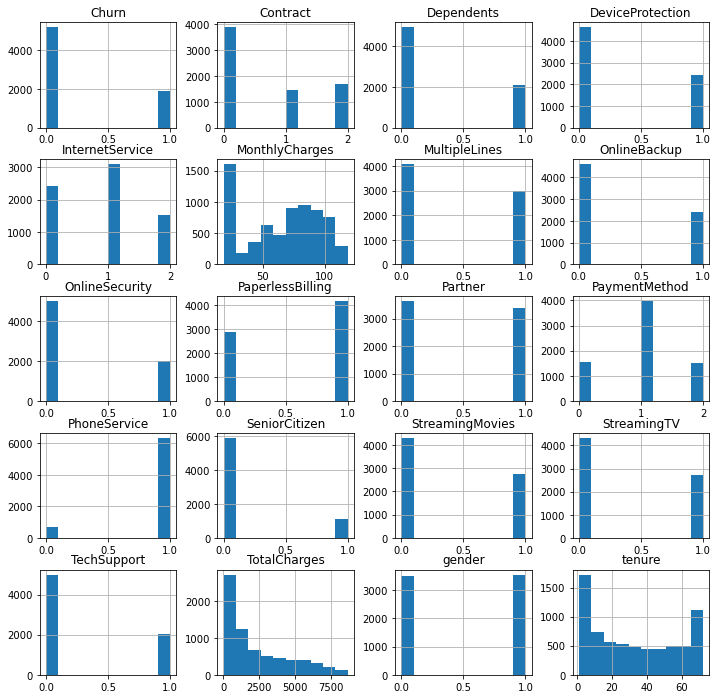

In [32]:
df.hist(figsize=(12,12),layout=(5,4),sharex=False);

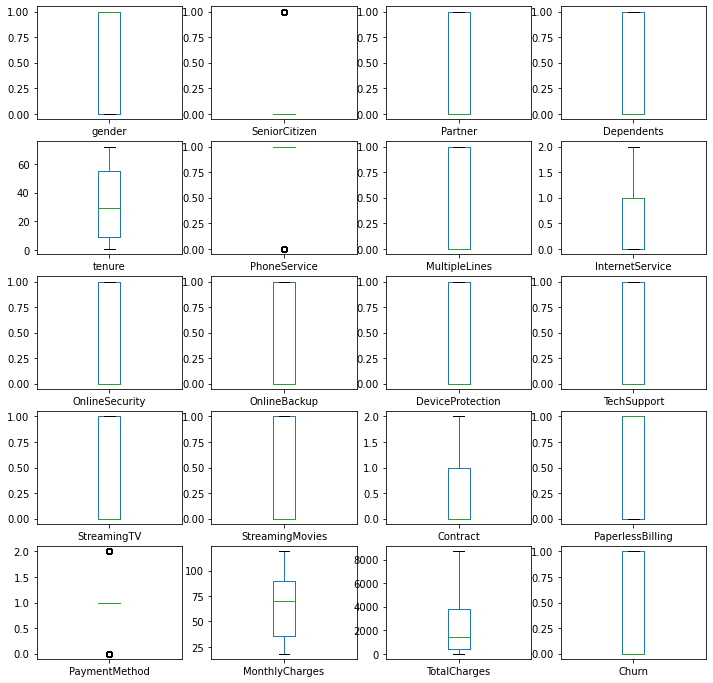

In [33]:
df.plot(kind='box',figsize=(12,12),layout=(5,4),sharex=False,subplots=True);

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [35]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_fr_fitting = ['tenure','MonthlyCharges','TotalCharges']
df[col_fr_fitting] = scaler.fit_transform(df[col_fr_fitting])

In [36]:
corr = df.corr()

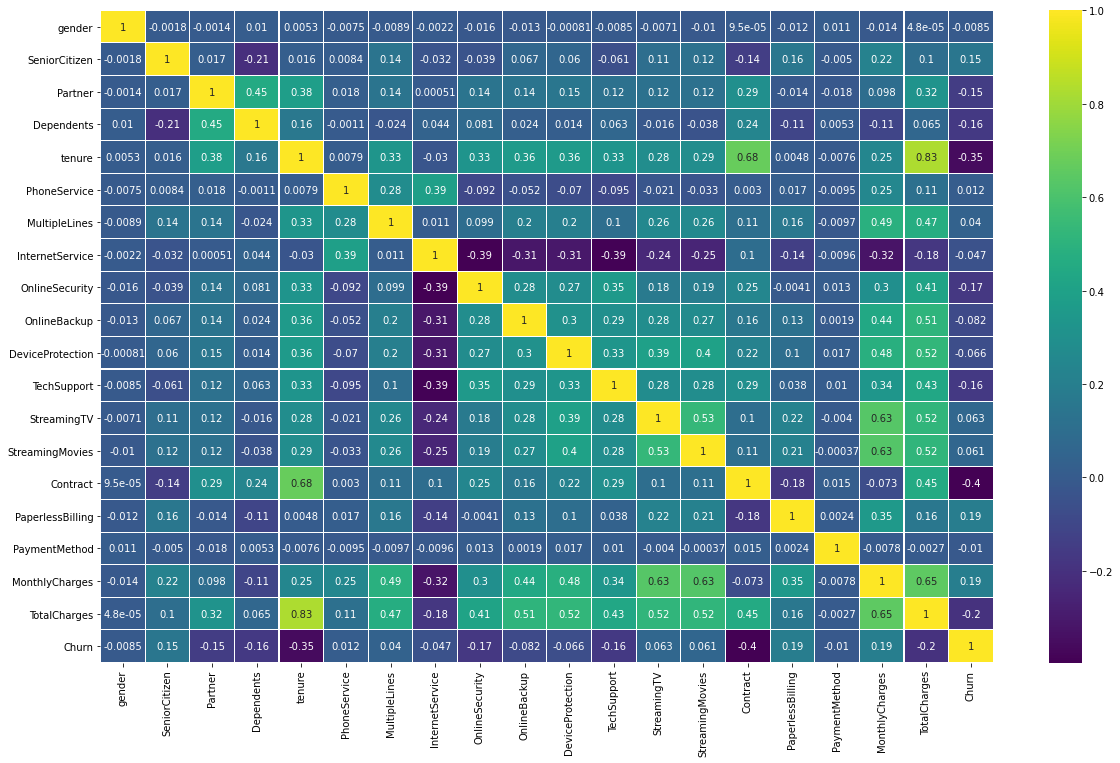

In [37]:
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,linewidth=0.1,linecolor='white',cmap='viridis');

In [38]:
corr['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.040033
PhoneService        0.011691
gender             -0.008545
PaymentMethod      -0.009960
InternetService    -0.047097
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

We can analyse that the variables like MonthlyCharges, PaperlessBilling, SeniorCitizen are correlated with the target variable

In [39]:
# perform One Hot Encoding using get_dummies method
df = pd.get_dummies(df, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

In [40]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_1',
       'SeniorCitizen_1', 'Partner_1', 'Dependents_1', 'PhoneService_1',
       'MultipleLines_1', 'InternetService_1', 'InternetService_2',
       'OnlineSecurity_1', 'OnlineBackup_1', 'DeviceProtection_1',
       'TechSupport_1', 'StreamingTV_1', 'StreamingMovies_1', 'Contract_1',
       'Contract_2', 'PaperlessBilling_1', 'PaymentMethod_1',
       'PaymentMethod_2'],
      dtype='object')

As above, we dont see any kind of issue with outliers.

In [41]:
#Splitting the dataset
x = df.drop('Churn',axis=1)
y = df['Churn']

In [42]:
#### Finding the best random state
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAcc = 0
maxRS = 0
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test,predLR)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('The best random state is',maxAcc,'on random state',maxRS)

The best random state is 0.8186126669538992 on random state 85


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=85)

### Building Model

#### LogisticRegression

In [44]:
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8186126669538992
[[1553  170]
 [ 251  347]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1723
           1       0.67      0.58      0.62       598

    accuracy                           0.82      2321
   macro avg       0.77      0.74      0.75      2321
weighted avg       0.81      0.82      0.81      2321



In [45]:
### RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.7871607065919862
[[1532  191]
 [ 303  295]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1723
           1       0.61      0.49      0.54       598

    accuracy                           0.79      2321
   macro avg       0.72      0.69      0.70      2321
weighted avg       0.78      0.79      0.78      2321



In [46]:
#### DecisionTree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.7186557518311073
[[1367  356]
 [ 297  301]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1723
           1       0.46      0.50      0.48       598

    accuracy                           0.72      2321
   macro avg       0.64      0.65      0.64      2321
weighted avg       0.73      0.72      0.72      2321



In [47]:
#SupportVectorMachine
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8091339939681171
[[1571  152]
 [ 291  307]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1723
           1       0.67      0.51      0.58       598

    accuracy                           0.81      2321
   macro avg       0.76      0.71      0.73      2321
weighted avg       0.80      0.81      0.80      2321



#### Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
SCR = cross_val_score(LR,x,y,cv=5)
print('classification score for LogisticRegression is',SCR.mean())

SCR = cross_val_score(RF,x,y,cv=5)
print('classification score for RandomForestClassifier is',SCR.mean())

SCR = cross_val_score(DT,x,y,cv=5)
print('classification score for DecisionTreeClassifier is',SCR.mean())

SCR = cross_val_score(svc,x,y,cv=5)
print('classification score for SupportVector is',SCR.mean())

classification score for LogisticRegression is 0.8036106805941842
classification score for RandomForestClassifier is 0.7856924481433516
classification score for DecisionTreeClassifier is 0.7279559325906537
classification score for SupportVector is 0.8023304529981672


As per the cross validation score RandomForestClassifier is the best model without overfitting or underfitting. Now, we will do hyperparameter tuning to increase the accuracy score

In [49]:
parameter = {'max_depth':np.arange(2,15),'criterion':['gini','entropy']}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [50]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [51]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [52]:
mod = RandomForestClassifier(criterion='entropy',max_depth=11,random_state=85)
mod.fit(x_train,y_train)
predmod = mod.predict(x_test)
print(accuracy_score(y_test,predmod))

0.8078414476518742


We have arrived at 80.7% accuracy after the hyperparameter tuning.

In [53]:
### Saving the model
import pickle
filename = 'Customer_Churn.pkl'
pickle.dump(mod,open(filename,'wb'))

In [54]:
load_mod = pickle.load(open('Customer_Churn.pkl','rb'))
result = load_mod.score(x_test,y_test)
print(result*100)

80.78414476518742


In [55]:
conclusion = pd.DataFrame([load_mod.predict(x_test)[:],predmod[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021